In [1]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd

df = pd.read_csv("static/data/bestsellers_with_categories.csv")

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [2]:
df.count()
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [3]:
df_2019 = df[df['Year'] == 2019]
df_2019.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
44,Can't Hurt Me: Master Your Mind and Defy the Odds,David Goggins,4.8,16244,18,2019,Non Fiction
74,Difficult Riddles For Smart Kids: 300 Difficul...,M Prefontaine,4.6,7955,5,2019,Non Fiction


In [4]:
df_2019.count()

Name           50
Author         50
User Rating    50
Reviews        50
Price          50
Year           50
Genre          50
dtype: int64

In [15]:
df1 = df_2019.groupby('Author').mean().reset_index().sort_values('User Rating',ascending=False).head(10)

fig = px.bar(df1, x='Author', y='User Rating')
fig.update_xaxes(type='category')
fig.show()

The r-squared is: -0.11
Regression line equation is: y = -118.13x + 13500.82


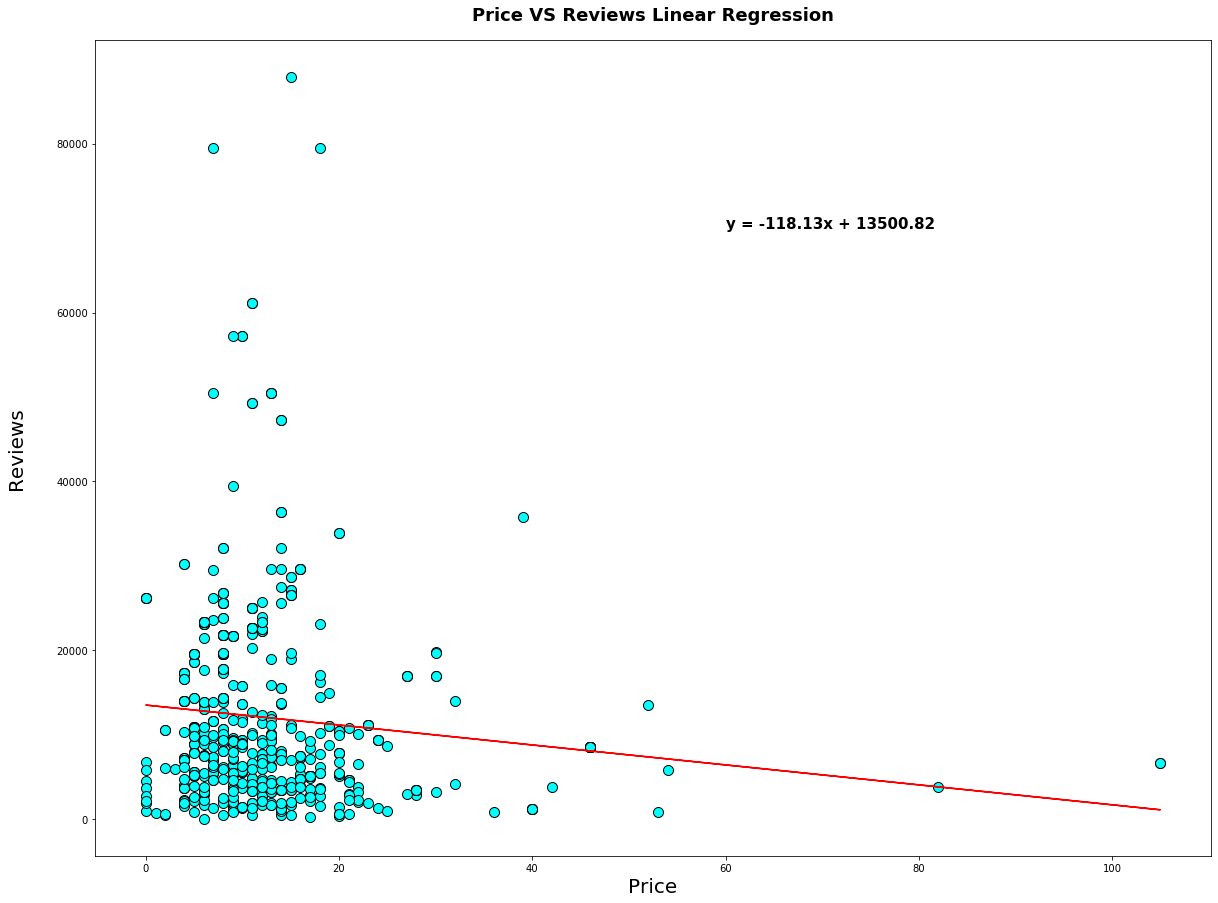

In [18]:
#Convert the values
x_values = df['Price']
y_values = df['Reviews']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the regression line and scatter plot
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values,edgecolors="black", facecolors="cyan",s=100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,70000),fontsize=15,color="black", fontweight='bold')

#Labels 
plt.xlabel('Price', fontsize=20,color='black')
plt.ylabel('Reviews',labelpad=30, fontsize=20,color='black')
plt.title('Price VS Reviews Linear Regression', fontsize=18, fontweight='black', color='black',pad=20)

#Print the output
print(f"The r-squared is: {round(rvalue,2)}")
print(f"Regression line equation is: {line_eq}")

#plt.savefig("Images/Reviews.png")

plt.show()

The r-squared is: -0.13
Regression line equation is: y = -0.0x + 4.65


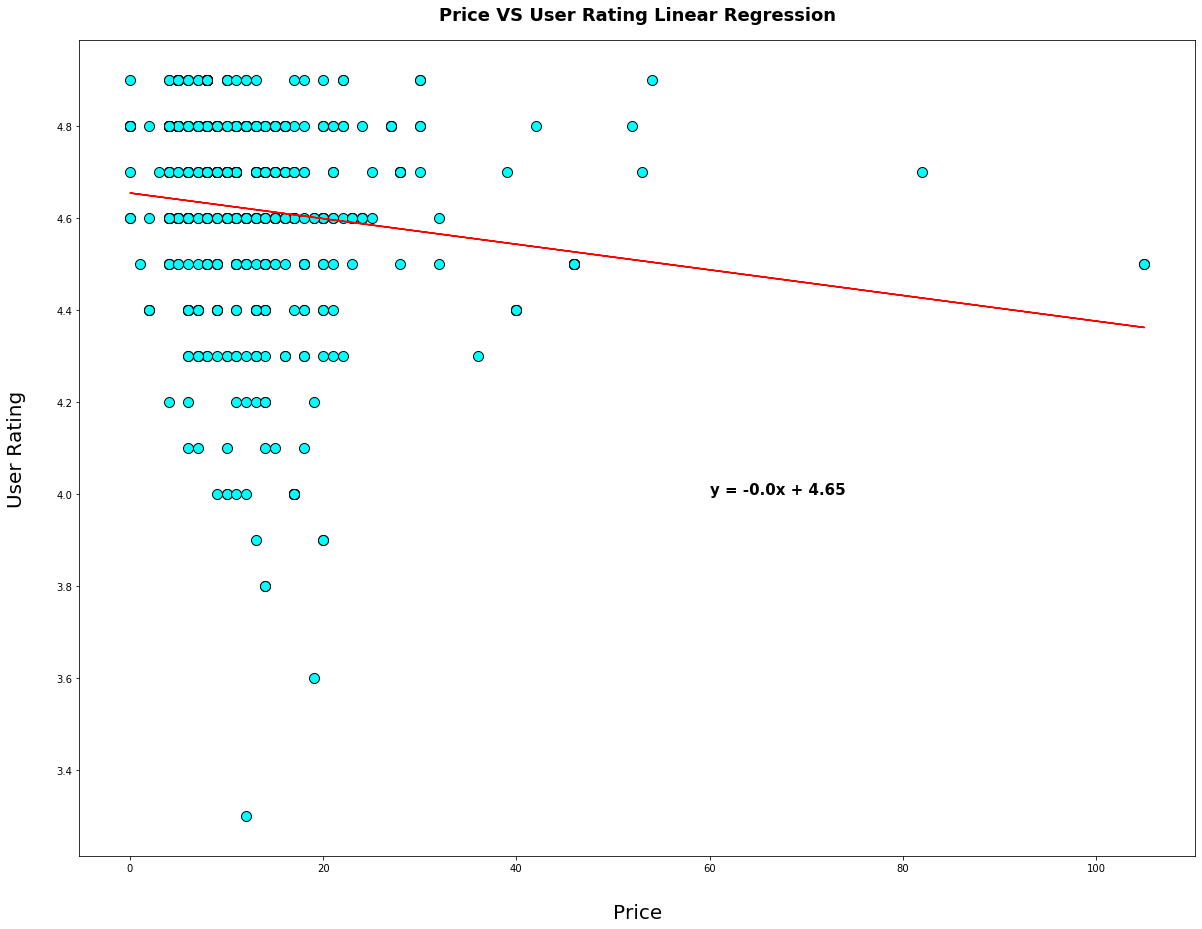

In [7]:

#Convert the values
x_values = df['Price']
y_values = df['User Rating']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the regression line and scatter plot
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values,edgecolors="black", facecolors="cyan",s=100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,4),fontsize=15,color="black", fontweight='bold')

#Labels 
plt.xlabel('Price',labelpad=30, fontsize=20,color='black')
plt.ylabel('User Rating',labelpad=30, fontsize=20,color='black')
plt.title('Price VS User Rating Linear Regression', fontsize=18, fontweight='bold', color='black',pad=20)

#Print the output
print(f"The r-squared is: {round(rvalue,2)}")
print(f"Regression line equation is: {line_eq}")

#plt.savefig("Images/User_Rating.png")

plt.show()
